<h1>Težinski grafovi u SAGE-u</h1>

In [1]:
import sage.misc.banner
banner()

┌────────────────────────────────────────────────────────────────────┐
│ SageMath version 9.2, Release Date: 2020-10-24                     │
│ Using Python 3.8.6. Type "help()" for help.                        │
└────────────────────────────────────────────────────────────────────┘


In [2]:
from IPython.core.display import HTML

In [3]:
var('A B C D E F G H I S T')

(A, B, C, D, E, F, G, H, I, S, T)

<h3>Definiranje težinskog grafa</h3>
<h4>1. način</h4>

In [4]:
G1=Graph({A:{B:5,C:2,D:4,E:10},
          B:{D:8},
          C:{E:7,F:5},
          D:{E:6,G:2},
          E:{F:3,G:2,H:3},
          F:{H:2,I:4},
          G:{H:3},
          H:{I:5}
          },weighted=True)

In [5]:
pozicijeG1={A:[-1,0],B:[-1,1],C:[-1,-1],D:[0,1],E:[0,0],F:[0,-1],G:[1,1],H:[1,0],I:[1,-1]}

In [6]:
G1.plot(pos=pozicijeG1,edge_labels=True,figsize=[4,4])

In [7]:
G1.weighted_adjacency_matrix()

[ 0 10  2  0  0  4  5  0  0]
[10  0  7  0  2  6  0  3  3]
[ 2  7  0  0  0  0  0  0  5]
[ 0  0  0  0  0  0  0  5  4]
[ 0  2  0  0  0  2  0  3  0]
[ 4  6  0  0  2  0  8  0  0]
[ 5  0  0  0  0  8  0  0  0]
[ 0  3  0  5  3  0  0  0  2]
[ 0  3  5  4  0  0  0  2  0]

In [8]:
G1.vertices()

[A, E, C, I, G, D, B, H, F]

<h4>2. način</h4>

In [9]:
matrica=G1.weighted_adjacency_matrix()

In [10]:
G2=Graph(matrica,format="weighted_adjacency_matrix")

In [11]:
G2.vertices()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [12]:
pozicijeG2={3:[-1,0],0:[-1,1],7:[-1,-1],5:[0,1],2:[0,0],8:[0,-1],6:[1,1],4:[1,0],1:[1,-1]}

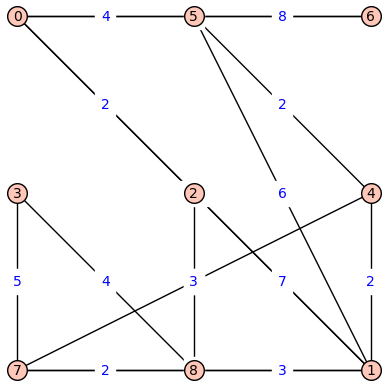

In [13]:
G2.plot(pos=pozicijeG2,edge_labels=True,figsize=[4,4])

<h4>3. način</h4>
<p>Možemo koristiti NetworkX modul.</p>

In [14]:
import networkx as nx

In [15]:
G3=nx.read_edgelist("tezinskiGraf1_edgelist.sage",nodetype=str)

In [16]:
pozicije={'A':(0,2),'B':(0,4),'C':(0,0),'D':(2,4),'E':(2,2),'F':(2,0),'G':(4,4),'H':(4,2),'I':(4,0)}
nx.draw(G3,pos=pozicije,with_labels=True,node_color='y')
nx.draw_networkx_edge_labels(G3,pos=pozicije,edge_labels=nx.get_edge_attributes(G3,'weight'));

<h2>Najkraći putovi u težinskim grafovima</h2>

<p><strong>Najkraći putovi od vrha A prema svim preostalim vrhovima </strong></p>
<p style="line-height:25px;">Po defaultu je <span style="color: #ff0000;"><em>by_weight=False</em></span>, što znači da će metoda <em><span style="color: #ff0000;">shortest_paths</span></em> zanemariti težine bridova i tražiti najkraće putove u pripadnom netežinskom grafu pomoću BFS algoritma. Ako stavimo <span style="color: #ff0000;"><em>by_weight=True</em></span>, tada će se uzeti težine u obzir i koristit će se Dijkstrin algoritam. Potpuno ista situacija je i za ostale slične metode koje se dolje spominju.</p>

In [17]:
G1.shortest_paths(A)

{A: [A],
 B: [A, B],
 D: [A, D],
 C: [A, C],
 E: [A, E],
 F: [A, E, F],
 H: [A, E, H],
 G: [A, E, G],
 I: [A, E, H, I]}

In [18]:
G1.shortest_paths(A,by_weight=True)

{A: [A],
 E: [A, D, G, E],
 C: [A, C],
 I: [A, C, F, I],
 G: [A, D, G],
 D: [A, D],
 B: [A, B],
 H: [A, D, G, H],
 F: [A, C, F]}

In [19]:
nx.shortest_path(G3,"A")

{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'D': ['A', 'D'],
 'E': ['A', 'E'],
 'F': ['A', 'C', 'F'],
 'G': ['A', 'D', 'G'],
 'H': ['A', 'E', 'H'],
 'I': ['A', 'C', 'F', 'I']}

In [20]:
nx.single_source_dijkstra_path(G3,'A')

{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'D': ['A', 'D'],
 'E': ['A', 'D', 'G', 'E'],
 'F': ['A', 'C', 'F'],
 'G': ['A', 'D', 'G'],
 'H': ['A', 'D', 'G', 'H'],
 'I': ['A', 'C', 'F', 'I']}

<p><strong>Udaljenosti od vrha A prema svim preostalim vrhovima</strong></p>

In [21]:
G1.shortest_path_lengths(A)

{A: 0, B: 1, D: 1, C: 1, E: 1, F: 2, H: 2, G: 2, I: 3}

In [22]:
G1.shortest_path_lengths(A,by_weight=True)

{A: 0, E: 8, C: 2, I: 11, G: 6, D: 4, B: 5, H: 9, F: 7}

In [23]:
nx.shortest_path_length(G3,"A")

{'A': 0, 'E': 1, 'B': 1, 'D': 1, 'C': 1, 'F': 2, 'G': 2, 'H': 2, 'I': 3}

In [24]:
nx.single_source_dijkstra_path_length(G3,'A')

{'A': 0, 'C': 2, 'D': 4, 'B': 5, 'G': 6, 'F': 7, 'E': 8, 'H': 9, 'I': 11}

<p><strong>Najkraći putovi od vrha C prema svim preostalim vrhovima</strong></p>

In [25]:
G1.shortest_paths(C)

{C: [C],
 F: [C, F],
 E: [C, E],
 A: [C, A],
 B: [C, A, B],
 D: [C, A, D],
 H: [C, E, H],
 G: [C, E, G],
 I: [C, F, I]}

In [26]:
G1.shortest_paths(C,by_weight=True)

{A: [C, A],
 E: [C, E],
 C: [C],
 I: [C, F, I],
 G: [C, A, D, G],
 D: [C, A, D],
 B: [C, A, B],
 H: [C, F, H],
 F: [C, F]}

In [27]:
nx.shortest_path(G3,"C")

{'C': ['C'],
 'A': ['C', 'A'],
 'E': ['C', 'E'],
 'F': ['C', 'F'],
 'B': ['C', 'A', 'B'],
 'D': ['C', 'A', 'D'],
 'G': ['C', 'E', 'G'],
 'H': ['C', 'E', 'H'],
 'I': ['C', 'F', 'I']}

In [28]:
nx.single_source_dijkstra_path(G3,"C")

{'C': ['C'],
 'A': ['C', 'A'],
 'E': ['C', 'E'],
 'F': ['C', 'F'],
 'B': ['C', 'A', 'B'],
 'D': ['C', 'A', 'D'],
 'H': ['C', 'F', 'H'],
 'I': ['C', 'F', 'I'],
 'G': ['C', 'A', 'D', 'G']}

<p><strong>Udaljenosti od vrha C prema svim preostalim vrhovima</strong></p>

In [29]:
G1.shortest_path_lengths(C)

{C: 0, F: 1, E: 1, A: 1, B: 2, D: 2, H: 2, G: 2, I: 2}

In [30]:
G1.shortest_path_lengths(C,by_weight=True)

{A: 2, E: 7, C: 0, I: 9, G: 8, D: 6, B: 7, H: 7, F: 5}

In [31]:
nx.shortest_path_length(G3,"C")

{'C': 0, 'F': 1, 'A': 1, 'E': 1, 'G': 2, 'I': 2, 'B': 2, 'D': 2, 'H': 2}

In [32]:
nx.single_source_dijkstra_path_length(G3,"C")

{'C': 0, 'A': 2, 'F': 5, 'D': 6, 'E': 7, 'B': 7, 'H': 7, 'G': 8, 'I': 9}

<p><strong>Najkraći put od vha A do vrha E</strong></p>

In [33]:
G1.shortest_path(A,E)

[A, E]

In [34]:
G1.shortest_path(A,E,by_weight=True)

[A, D, G, E]

In [35]:
nx.shortest_path(G3,"A","E")

['A', 'E']

In [36]:
nx.dijkstra_path(G3,"A","E")

['A', 'D', 'G', 'E']

<p><strong>Udaljenost između vrhova A i E</strong></p>

In [37]:
G1.shortest_path_length(A,E)

1

In [38]:
G1.shortest_path_length(A,E,by_weight=True)

8

In [39]:
nx.shortest_path_length(G3,"A","E")

1

In [40]:
nx.dijkstra_path_length(G3,"A","E")

8

<p><strong>Najkraći put od vrha F do vrha B</strong></p>

In [41]:
G1.shortest_path(F,B)

[F, E, A, B]

In [42]:
G1.shortest_path(F,B,by_weight=True)

[F, C, A, B]

In [43]:
nx.shortest_path(G3,"F","B")

['F', 'C', 'A', 'B']

In [44]:
nx.dijkstra_path(G3,"F","B")

['F', 'C', 'A', 'B']

<p><strong>Udaljenost između vrhova F i B</strong></p>

In [45]:
G1.shortest_path_length(F,B)

3

In [46]:
G1.shortest_path_length(F,B,by_weight=True)

12

In [47]:
nx.shortest_path_length(G3,"F","B")

3

In [48]:
nx.dijkstra_path_length(G3,"F","B")

12

<p>možemo definirati svoju funkciju koja će nam ispisati konačne oznake vrhova onako kako mi provodimo Dijkstrin algoritam ručno</p>

In [49]:
def rucni_dijkstra(graf,vrh):
    udaljenosti=graf.shortest_path_lengths(vrh,by_weight=True)
    putovi=graf.shortest_paths(vrh,by_weight=True)
    vrhovi=graf.vertices()
    oznake=[]
    for v in vrhovi:
        if v==vrh:
            oznake.append(("-",0))
        else:
            oznake.append((putovi[v][-2],udaljenosti[v]))
    return table([vrhovi,oznake])

<p>Najkraći putovi od vrha A</p>

In [50]:
rucni_dijkstra(G1,A)

A          E        C        I         G        D        B        H        F
  ('-', 0)   (G, 8)   (A, 2)   (F, 11)   (D, 6)   (A, 4)   (A, 5)   (G, 9)   (C, 7)

<p>Najkraći putovi od vrha B</p>

In [51]:
rucni_dijkstra(G1,B)

A        E         C        I         G         D        B          H         F
  (B, 5)   (G, 12)   (A, 7)   (F, 16)   (D, 10)   (B, 8)   ('-', 0)   (G, 13)   (C, 12)

<p>Ako želimo najkraći put istaknuti na grafu, definiramo svoju funkciju koja će to raditi.</p>

In [52]:
def najkraci_put(G,v1,v2,raspored_vrhova=None,laj="circular"):
    put=G.shortest_path(v1,v2,by_weight=True)
    bridovi=G.edges(labels=False)
    bridovi_put=[]
    for i in range(len(put)-1):
        if (put[i],put[i+1]) in bridovi:
            bridovi_put.append((put[i],put[i+1]))
        else:
            bridovi_put.append((put[i+1],put[i]))
    if raspored_vrhova==None:
        slika=G.plot(edge_colors={"red":bridovi_put},vertex_colors={"cyan":[v1,v2]},layout=laj,edge_labels=True)
    else:
        slika=G.plot(edge_colors={"red":bridovi_put},vertex_colors={"cyan":[v1,v2]},pos=raspored_vrhova,edge_labels=True)
    return slika

In [53]:
najkraci_put(G1,A,E,raspored_vrhova=pozicijeG1).show(figsize=[4,4])

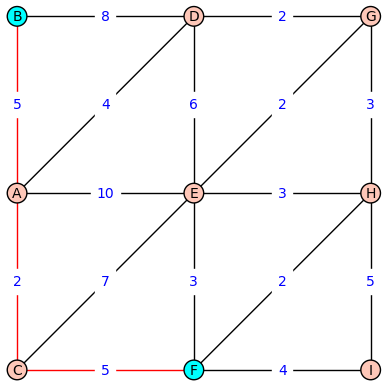

In [54]:
najkraci_put(G1,F,B,raspored_vrhova=pozicijeG1).show(figsize=[4,4])

In [55]:
najkraci_put(G1,A,H,raspored_vrhova=pozicijeG1).show(figsize=[4,4])

<p>Ako želimo istaknuti stablo najkraćih putova iz nekog vrha na grafu, definiramo svoju funkciju koja će to raditi</p>

In [56]:
def stablo_najkracih_putova(G,v0,raspored_vrhova=None,laj="circular"):
    stablo=G.shortest_paths(v0,by_weight=True)
    bridovi=G.edges(labels=False)
    bridovi_stablo=[]
    for k in stablo:
        if k!=v0:
            for i in range(len(stablo[k])-1):
                if ((stablo[k][i],stablo[k][i+1]) in bridovi) and (not((stablo[k][i],stablo[k][i+1]) in bridovi_stablo)):
                    bridovi_stablo.append((stablo[k][i],stablo[k][i+1]))
                elif ((stablo[k][i+1],stablo[k][i]) in bridovi) and (not((stablo[k][i+1],stablo[k][i]) in bridovi_stablo)):
                    bridovi_stablo.append((stablo[k][i+1],stablo[k][i]))
    if raspored_vrhova==None:
        slika=G.plot(edge_colors={"red":bridovi_stablo},vertex_colors={"cyan":[v0]},layout=laj,edge_labels=True)
    else:
        slika=G.plot(edge_colors={"red":bridovi_stablo},vertex_colors={"cyan":[v0]},pos=raspored_vrhova,edge_labels=True)
    return slika

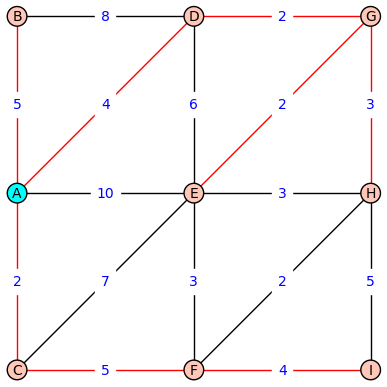

In [57]:
stablo_najkracih_putova(G1,A,raspored_vrhova=pozicijeG1).show(figsize=[4,4])

In [58]:
stablo_najkracih_putova(G1,B,raspored_vrhova=pozicijeG1).show(figsize=[4,4])

<h2>Floyd-Warshallov algoritam</h2>

<p style="line-height:25px;">Na izlazu daje uređeni par <span style="color: #ff0000;"><em>(udaljenosti, prethodnici)</em></span>. Prva komponenta <span style="color: #ff0000;"><em>udaljenosti</em></span> je rječnik čiji ključevi su vrhovi težinskog grafa, a vrijednosti ključeva su ponovno rječnici tako da je <em><span style="color: #ff0000;">udaljenosti[u][v]</span></em> jednako duljini najkraćeg puta od vrha <em><span style="color: #ff0000;">u</span></em> do vrha <span style="color: #ff0000;"><em>v</em></span> u težinskom grafu. Druga komponenta <em><span style="color: #ff0000;">prethodnici</span></em> je također rječnik čiji ključevi su vrhovi težinskog grafa, a vrijednosti ključeva su ponovo rječnici tako da je <em><span style="color: #ff0000;">prethodnici[u][v]</span></em> prethodnik vrha <em><span style="color: #ff0000;">v</span></em> na najkraćem putu od vrha <span style="color: #ff0000;"><em>u</em></span> do vrha <span style="color: #ff0000;"><em>v</em></span> u težinskom grafu.</p>

In [59]:
G1.shortest_path_all_pairs()

({A: {A: 0, E: 1, C: 1, I: 3, G: 2, D: 1, B: 1, H: 2, F: 2},
  E: {A: 1, E: 0, C: 1, I: 2, G: 1, D: 1, B: 2, H: 1, F: 1},
  C: {A: 1, E: 1, C: 0, I: 2, G: 2, D: 2, B: 2, H: 2, F: 1},
  I: {A: 3, E: 2, C: 2, I: 0, G: 2, D: 3, B: 4, H: 1, F: 1},
  G: {A: 2, E: 1, C: 2, I: 2, G: 0, D: 1, B: 2, H: 1, F: 2},
  D: {A: 1, E: 1, C: 2, I: 3, G: 1, D: 0, B: 1, H: 2, F: 2},
  B: {A: 1, E: 2, C: 2, I: 4, G: 2, D: 1, B: 0, H: 3, F: 3},
  H: {A: 2, E: 1, C: 2, I: 1, G: 1, D: 2, B: 3, H: 0, F: 1},
  F: {A: 2, E: 1, C: 1, I: 1, G: 2, D: 2, B: 3, H: 1, F: 0}},
 {A: {A: None, E: A, C: A, I: H, G: E, D: A, B: A, H: E, F: E},
  E: {A: E, E: None, C: E, I: H, G: E, D: E, B: A, H: E, F: E},
  C: {A: C, E: C, C: None, I: F, G: E, D: A, B: A, H: E, F: C},
  I: {A: E, E: H, C: F, I: None, G: H, D: E, B: A, H: I, F: I},
  G: {A: E, E: G, C: E, I: H, G: None, D: G, B: D, H: G, F: E},
  D: {A: D, E: D, C: A, I: H, G: D, D: None, B: D, H: E, F: E},
  B: {A: B, E: A, C: A, I: H, G: D, D: B, B: None, H: E, F: E},
  

<p><strong>samo udaljenosti između pojedinih vrhova<br /></strong></p>

In [60]:
G1.shortest_path_all_pairs()[0]

{A: {A: 0, E: 1, C: 1, I: 3, G: 2, D: 1, B: 1, H: 2, F: 2},
 E: {A: 1, E: 0, C: 1, I: 2, G: 1, D: 1, B: 2, H: 1, F: 1},
 C: {A: 1, E: 1, C: 0, I: 2, G: 2, D: 2, B: 2, H: 2, F: 1},
 I: {A: 3, E: 2, C: 2, I: 0, G: 2, D: 3, B: 4, H: 1, F: 1},
 G: {A: 2, E: 1, C: 2, I: 2, G: 0, D: 1, B: 2, H: 1, F: 2},
 D: {A: 1, E: 1, C: 2, I: 3, G: 1, D: 0, B: 1, H: 2, F: 2},
 B: {A: 1, E: 2, C: 2, I: 4, G: 2, D: 1, B: 0, H: 3, F: 3},
 H: {A: 2, E: 1, C: 2, I: 1, G: 1, D: 2, B: 3, H: 0, F: 1},
 F: {A: 2, E: 1, C: 1, I: 1, G: 2, D: 2, B: 3, H: 1, F: 0}}

<p><strong>samo prethodnici vrhova na odgovarajućim najkraćim putovima</strong></p>

In [61]:
G1.shortest_path_all_pairs()[1]

{A: {A: None, E: A, C: A, I: H, G: E, D: A, B: A, H: E, F: E},
 E: {A: E, E: None, C: E, I: H, G: E, D: E, B: A, H: E, F: E},
 C: {A: C, E: C, C: None, I: F, G: E, D: A, B: A, H: E, F: C},
 I: {A: E, E: H, C: F, I: None, G: H, D: E, B: A, H: I, F: I},
 G: {A: E, E: G, C: E, I: H, G: None, D: G, B: D, H: G, F: E},
 D: {A: D, E: D, C: A, I: H, G: D, D: None, B: D, H: E, F: E},
 B: {A: B, E: A, C: A, I: H, G: D, D: B, B: None, H: E, F: E},
 H: {A: E, E: H, C: E, I: H, G: H, D: E, B: A, H: None, F: H},
 F: {A: E, E: F, C: F, I: F, G: E, D: E, B: A, H: F, F: None}}

<p><strong>Slično radi i <span style="color: #ff0000;"><em>floyd_warshall</em></span> metoda u networkx modulu.</strong></p>

In [62]:
nx.floyd_warshall_predecessor_and_distance(G3)

({'A': {'B': 'A',
   'C': 'A',
   'D': 'A',
   'E': 'G',
   'F': 'C',
   'G': 'D',
   'H': 'F',
   'I': 'F'},
  'B': {'A': 'B',
   'D': 'B',
   'C': 'A',
   'E': 'G',
   'F': 'C',
   'G': 'D',
   'H': 'G',
   'I': 'F'},
  'C': {'A': 'C',
   'E': 'C',
   'F': 'C',
   'B': 'A',
   'D': 'A',
   'G': 'D',
   'H': 'F',
   'I': 'F'},
  'D': {'A': 'D',
   'B': 'D',
   'E': 'G',
   'G': 'D',
   'C': 'A',
   'F': 'E',
   'H': 'G',
   'I': 'H'},
  'E': {'A': 'D',
   'C': 'E',
   'D': 'G',
   'F': 'E',
   'G': 'E',
   'H': 'E',
   'B': 'D',
   'I': 'F'},
  'F': {'C': 'F',
   'E': 'F',
   'H': 'F',
   'I': 'F',
   'A': 'C',
   'B': 'A',
   'D': 'G',
   'G': 'E'},
  'G': {'D': 'G',
   'E': 'G',
   'H': 'G',
   'A': 'D',
   'B': 'D',
   'C': 'A',
   'F': 'E',
   'I': 'H'},
  'H': {'E': 'H',
   'F': 'H',
   'G': 'H',
   'I': 'H',
   'A': 'C',
   'B': 'D',
   'C': 'F',
   'D': 'G'},
  'I': {'F': 'I',
   'H': 'I',
   'A': 'C',
   'B': 'A',
   'C': 'F',
   'D': 'G',
   'E': 'F',
   'G': 'H'}},
 {'A': de

In [63]:
nx.floyd_warshall_predecessor_and_distance(G3)[0]

{'A': {'B': 'A',
  'C': 'A',
  'D': 'A',
  'E': 'G',
  'F': 'C',
  'G': 'D',
  'H': 'F',
  'I': 'F'},
 'B': {'A': 'B',
  'D': 'B',
  'C': 'A',
  'E': 'G',
  'F': 'C',
  'G': 'D',
  'H': 'G',
  'I': 'F'},
 'C': {'A': 'C',
  'E': 'C',
  'F': 'C',
  'B': 'A',
  'D': 'A',
  'G': 'D',
  'H': 'F',
  'I': 'F'},
 'D': {'A': 'D',
  'B': 'D',
  'E': 'G',
  'G': 'D',
  'C': 'A',
  'F': 'E',
  'H': 'G',
  'I': 'H'},
 'E': {'A': 'D',
  'C': 'E',
  'D': 'G',
  'F': 'E',
  'G': 'E',
  'H': 'E',
  'B': 'D',
  'I': 'F'},
 'F': {'C': 'F',
  'E': 'F',
  'H': 'F',
  'I': 'F',
  'A': 'C',
  'B': 'A',
  'D': 'G',
  'G': 'E'},
 'G': {'D': 'G',
  'E': 'G',
  'H': 'G',
  'A': 'D',
  'B': 'D',
  'C': 'A',
  'F': 'E',
  'I': 'H'},
 'H': {'E': 'H',
  'F': 'H',
  'G': 'H',
  'I': 'H',
  'A': 'C',
  'B': 'D',
  'C': 'F',
  'D': 'G'},
 'I': {'F': 'I',
  'H': 'I',
  'A': 'C',
  'B': 'A',
  'C': 'F',
  'D': 'G',
  'E': 'F',
  'G': 'H'}}

In [64]:
nx.floyd_warshall_predecessor_and_distance(G3)[1]

{'A': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7fdd6ff8b0d0>, {'A': 0, 'B': 5, 'C': 2, 'D': 4, 'E': 8, 'F': 7, 'G': 6, 'H': 9, 'I': 11}),
 'B': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7fdd6ff8b160>, {'B': 0, 'A': 5, 'D': 8, 'C': 7, 'E': 12, 'F': 12, 'G': 10, 'H': 13, 'I': 16}),
 'C': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7fdd6ff8b1f0>, {'C': 0, 'A': 2, 'E': 7, 'F': 5, 'B': 7, 'D': 6, 'G': 8, 'H': 7, 'I': 9}),
 'D': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7fdd6ff8b280>, {'D': 0, 'A': 4, 'B': 8, 'E': 4, 'G': 2, 'C': 6, 'F': 7, 'H': 5, 'I': 10}),
 'E': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7fdd6ff8b310>, {'E': 0, 'A': 8, 'C': 7, 'D': 4, 'F': 3, 'G': 2, 'H': 3, 'B': 12, 'I': 7}

<p><strong>ili preko Dijkstrinog algoritma</strong></p>

In [65]:
dict(nx.all_pairs_dijkstra_path(G3))

{'A': {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'D': ['A', 'D'],
  'E': ['A', 'D', 'G', 'E'],
  'F': ['A', 'C', 'F'],
  'G': ['A', 'D', 'G'],
  'H': ['A', 'D', 'G', 'H'],
  'I': ['A', 'C', 'F', 'I']},
 'B': {'B': ['B'],
  'A': ['B', 'A'],
  'D': ['B', 'D'],
  'C': ['B', 'A', 'C'],
  'E': ['B', 'D', 'G', 'E'],
  'F': ['B', 'A', 'C', 'F'],
  'G': ['B', 'D', 'G'],
  'H': ['B', 'D', 'G', 'H'],
  'I': ['B', 'A', 'C', 'F', 'I']},
 'C': {'C': ['C'],
  'A': ['C', 'A'],
  'E': ['C', 'E'],
  'F': ['C', 'F'],
  'B': ['C', 'A', 'B'],
  'D': ['C', 'A', 'D'],
  'H': ['C', 'F', 'H'],
  'I': ['C', 'F', 'I'],
  'G': ['C', 'A', 'D', 'G']},
 'D': {'D': ['D'],
  'A': ['D', 'A'],
  'B': ['D', 'B'],
  'E': ['D', 'G', 'E'],
  'G': ['D', 'G'],
  'H': ['D', 'G', 'H'],
  'C': ['D', 'A', 'C'],
  'F': ['D', 'G', 'E', 'F'],
  'I': ['D', 'G', 'H', 'I']},
 'E': {'E': ['E'],
  'A': ['E', 'G', 'D', 'A'],
  'C': ['E', 'C'],
  'D': ['E', 'G', 'D'],
  'F': ['E', 'F'],
  'G': ['E', 'G'],
  'H': ['E', 'H'],
  'I

In [66]:
dict(nx.all_pairs_dijkstra_path_length(G3))

{'A': {'A': 0,
  'C': 2,
  'D': 4,
  'B': 5,
  'G': 6,
  'F': 7,
  'E': 8,
  'H': 9,
  'I': 11},
 'B': {'B': 0,
  'A': 5,
  'C': 7,
  'D': 8,
  'G': 10,
  'F': 12,
  'E': 12,
  'H': 13,
  'I': 16},
 'C': {'C': 0, 'A': 2, 'F': 5, 'D': 6, 'E': 7, 'B': 7, 'H': 7, 'G': 8, 'I': 9},
 'D': {'D': 0,
  'G': 2,
  'A': 4,
  'E': 4,
  'H': 5,
  'C': 6,
  'F': 7,
  'B': 8,
  'I': 10},
 'E': {'E': 0,
  'G': 2,
  'F': 3,
  'H': 3,
  'D': 4,
  'C': 7,
  'I': 7,
  'A': 8,
  'B': 12},
 'F': {'F': 0,
  'H': 2,
  'E': 3,
  'I': 4,
  'C': 5,
  'G': 5,
  'A': 7,
  'D': 7,
  'B': 12},
 'G': {'G': 0,
  'D': 2,
  'E': 2,
  'H': 3,
  'F': 5,
  'A': 6,
  'I': 8,
  'C': 8,
  'B': 10},
 'H': {'H': 0,
  'F': 2,
  'E': 3,
  'G': 3,
  'I': 5,
  'D': 5,
  'C': 7,
  'A': 9,
  'B': 13},
 'I': {'I': 0,
  'F': 4,
  'H': 5,
  'E': 7,
  'G': 8,
  'C': 9,
  'D': 10,
  'A': 11,
  'B': 16}}

<p style="line-height:25px;">Možemo definirati funkciju <span style="color: #ff0000;"><strong>FW</strong></span> koja će ispisati u obliku tablice pojedine korake Floyd-Warshallovog algoritma. Koje točno korake želimo ispisati, navodimo u varijabli <em><span style="color: #ff0000;">step</span></em>. Na primjer, <em><span style="color: #ff0000;">step=[1,2,5]</span></em> ako želimo ispisati prvi, drugi i peti korak algoritma, <em><span style="color: #ff0000;">step=[3]</span></em> ako želimo ispisati treći korak algoritma, <em><span style="color: #ff0000;">step=range(6)</span></em> ako želimo ispisati prvih 5 koraka, uključujući i nulti korak. Varijabla <span style="color: #ff0000;"><em>redoslijed_vrhova</em></span> nam omogućuje da sami unaprijed rasporedimo vrhove u tablici; ako ništa ne navedemo, vrhovi grafa <span style="color: #ff0000;"><em>G</em></span> će biti raspoređeni onako kako su raspoređeni u listi <em><span style="color: #ff0000;">G.vertices()</span></em>. Varijabla <em><span style="color: #ff0000;">ncol</span></em> određuje u koliko stupaca će biti ispisane tablice za pojedine navedene korake algoritma. Funkcija <strong><span style="color: #ff0000;">FW_html</span></strong> nam omogućuje ispis u obliku tablice.</p>

In [67]:
def FW_html(lista,redak,stupac,korak=' '):
	lista=list(map(list,list(lista)))
	stupac=[korak]+stupac
	for k in range(len(lista)):
		lista[k]=[redak[k]]+lista[k]
	lista=[stupac]+lista
	return table(lista)

In [68]:
def FW(graf,step,ncol,redoslijed_vrhova=None):
    if redoslijed_vrhova==None:
        redoslijed_vrhova=graf.vertices()
    bridovi=graf.edges(labels=False)
    matrica=[[0 for j in range(len(redoslijed_vrhova))] for i in range(len(redoslijed_vrhova))]
    for i in range(len(redoslijed_vrhova)):
        for j in range(i+1,len(redoslijed_vrhova)):
            if (redoslijed_vrhova[i],redoslijed_vrhova[j]) in bridovi:
                matrica[i][j]=graf.edge_label(redoslijed_vrhova[i],redoslijed_vrhova[j])
                matrica[j][i]=graf.edge_label(redoslijed_vrhova[i],redoslijed_vrhova[j])
            elif (redoslijed_vrhova[j],redoslijed_vrhova[i]) in bridovi:
                matrica[i][j]=graf.edge_label(redoslijed_vrhova[j],redoslijed_vrhova[i])
                matrica[j][i]=graf.edge_label(redoslijed_vrhova[j],redoslijed_vrhova[i])
            else:
                matrica[i][j]=Infinity
                matrica[j][i]=Infinity
    koraci={0:deepcopy(matrica)}
    for k in range(len(redoslijed_vrhova)):
        for i in range(len(redoslijed_vrhova)):
            for j in range(len(redoslijed_vrhova)):
                matrica[i][j]=min(matrica[i][j],matrica[i][k]+matrica[k][j])
        koraci[k+1]=deepcopy(matrica)
    lista_tablica = []
    for t in step:
       lista_tablica.append(FW_html(koraci[t],redoslijed_vrhova,redoslijed_vrhova,'k='+str(t)))
    prikaz = '<table><tr style="background-color:white;">'
    for i in range(len(step)):
        prikaz = prikaz + '<td>' + html(lista_tablica[i]) + '</td>'
        if (i+1) % ncol == 0:
            prikaz = prikaz + '</tr>'
            if i+1 < len(step):
                prikaz = prikaz + '<tr style="background-color:white;">'
    if len(step) % ncol != 0:
        prikaz = prikaz + '</tr></table>'
    else:
        prikaz = prikaz + '</table>'
    return HTML(prikaz)

<p><strong>Nulti, treći i posljednji deveti korak Floyd-Warshallovog algoritma na težinskom grafu G1</strong></p>

In [69]:
FW(G1,step=[0,3,9],ncol=2,redoslijed_vrhova=[A,B,C,D,E,F,G,H,I])

<p><strong>Isprobajmo našu funkciju na dva primjera iz prezentacije</strong></p>

In [70]:
F1=Graph({"v1":{"v2":2},"v2":{"v3":3},"v3":{"v4":1}},weighted=True)

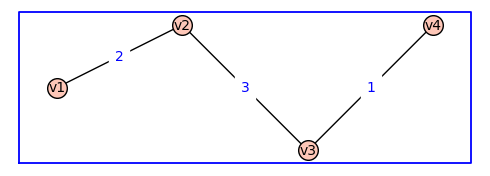

In [71]:
F1.plot(pos={"v1":[0,0],"v2":[1,0.5],"v3":[2,-0.5],"v4":[3,0.5]},edge_labels=True,graph_border=True,figsize=[5,4])

In [72]:
FW(F1,step=range(5),ncol=5)

In [73]:
F2=Graph({"v1":{"v2":15,"v3":5,"v4":1},"v2":{"v3":8,"v5":3},"v4":{"v5":2}},weighted=True)

In [74]:
F2.plot(pos={"v1":[0,3],"v2":[2,3.5],"v3":[1.2,2],"v4":[0.5,0],"v5":[4,0.3]},edge_labels=True,graph_border=True,figsize=[4,4])

In [75]:
FW(F2,step=range(6),ncol=3)

<h2>Kruskalov i Primov algoritam</h2>

In [76]:
graf=Graph({A:{B:6,D:2,E:9,S:7},B:{C:2,E:3,S:9},
            C:{E:2,F:6,S:1},D:{E:5,T:3},E:{F:7,T:9},
            F:{T:6}},weighted=True)

In [77]:
pozicijeGraf={A:[2,4],B:[2,2],C:[2,0],D:[4,4],E:[4,2],F:[4,0],S:[0,2],T:[6,2]}

In [78]:
graf.plot(pos=pozicijeGraf,edge_labels=True,graph_border=True,figsize=[5,5])

In [79]:
graf.min_spanning_tree(algorithm="Kruskal")

[(S, C, 1), (D, A, 2), (C, E, 2), (B, C, 2), (D, T, 3), (D, E, 5), (F, C, 6)]

In [80]:
graf.min_spanning_tree(algorithm="Prim_edge",starting_vertex=F)

[(F, C, 6), (S, C, 1), (C, E, 2), (B, C, 2), (D, E, 5), (D, A, 2), (D, T, 3)]

<p style="line-height:25px;">Dolje su definicije funkcija <strong><span style="color: #ff0000;">rucni_Kruskal</span></strong> i <strong><span style="color: #ff0000;">rucni_Prim</span></strong> koje nam na izlazu daju tablice kakve mi dobivamo ručnim provođenjem algoritama. Parametar <span style="color: #ff0000;"><em>opcija</em></span> može imati vrijednosti <span style="color: #ff0000;"><em>'min'</em></span> ili <span style="color: #ff0000;"><em>'max'</em></span> ovisno o tome želimo li minimalno ili maksimalno razapinjuće stablo.</p>

In [81]:
def rucni_Kruskal(G,opcija='min'):
    if opcija == 'min':
        bridovi=G.min_spanning_tree(algorithm="Kruskal")
    elif opcija == 'max':
        bridovi=G.min_spanning_tree(weight_function=lambda e: -e[2],algorithm="Kruskal")
    else:
        return "Error: postoje samo 'min' i 'max' opcija za Kruskalov algoritam"
    bridovi_stablo=list(map(lambda e: e[0:2],bridovi))
    bridovi_tezine=list(map(lambda e: e[2], bridovi))
    return table([['korak']+list(range(1,len(G))),['brid']+bridovi_stablo,['tezina']+bridovi_tezine])

In [82]:
rucni_Kruskal(graf)

korak    1        2        3        4        5        6        7
  brid     (S, C)   (D, A)   (C, E)   (B, C)   (D, T)   (D, E)   (F, C)
  tezina   1        2        2        2        3        5        6

In [83]:
rucni_Kruskal(graf,'max')

korak    1        2        3        4        5        6        7
  brid     (E, A)   (T, E)   (B, S)   (S, A)   (F, E)   (F, C)   (D, E)
  tezina   9        9        9        7        7        6        5

In [84]:
def rucni_Prim(G,v0,opcija='min'):
    if opcija == 'min':
        bridovi=G.min_spanning_tree(algorithm="Prim_edge",starting_vertex=v0)
    elif opcija == 'max':
        bridovi=G.min_spanning_tree(weight_function=lambda e: -e[2],algorithm="Prim_edge",starting_vertex=v0)
    else:
        return "Error: postoje samo 'min' i 'max' opcija za Primov algoritam"
    bridovi_stablo=list(map(lambda e: e[0:2],bridovi))
    bridovi_tezine=list(map(lambda e: e[2], bridovi))
    return table([[str(v0)+' / '+'korak']+list(range(1,len(G))),['brid']+bridovi_stablo,['tezina']+bridovi_tezine])

In [85]:
rucni_Prim(graf,F)

F / korak   1        2        3        4        5        6        7
  brid        (F, C)   (S, C)   (C, E)   (B, C)   (D, E)   (D, A)   (D, T)
  tezina      6        1        2        2        5        2        3

In [86]:
rucni_Prim(graf,F,'max')

F / korak   1        2        3        4        5        6        7
  brid        (F, E)   (E, A)   (T, E)   (S, A)   (B, S)   (F, C)   (D, E)
  tezina      7        9        9        7        9        6        5

<p><strong>želimo li istaknuti minimalno ili maksimalno Kruskal stablo na početnom težinskom grafu</strong></p>

In [87]:
def Kruskal_stablo(G,opcija='min',raspored_vrhova=None,lay="circular"):
    if opcija == 'min':
        bridovi=G.min_spanning_tree(algorithm="Kruskal")
    elif opcija == 'max':
        bridovi=G.min_spanning_tree(weight_function=lambda e: -e[2],algorithm="Kruskal")
    else:
        return "Error: postoje samo 'min' i 'max' opcija za Kruskalov algoritam"
    bridovi=map(lambda e: e[0:2], bridovi)
    if raspored_vrhova==None:
        slika=G.plot(edge_colors={"red":bridovi},layout=laj,edge_labels=True)
    else:
        slika=G.plot(edge_colors={"red":bridovi},pos=raspored_vrhova,edge_labels=True)
    return slika

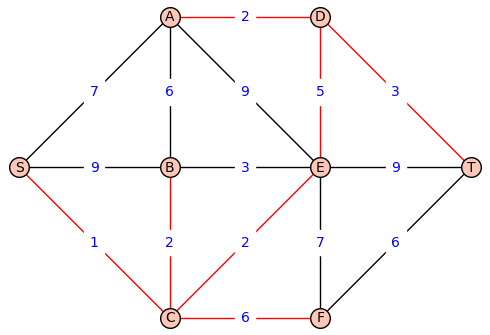

In [88]:
Kruskal_stablo(graf,raspored_vrhova=pozicijeGraf).show(figsize=[5,5])

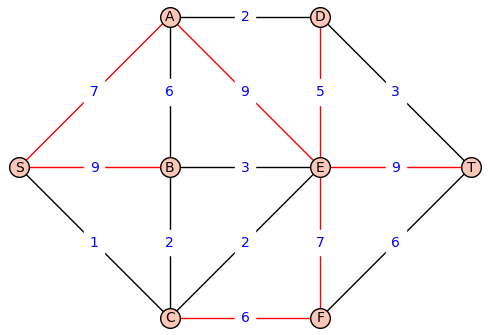

In [89]:
Kruskal_stablo(graf,'max',raspored_vrhova=pozicijeGraf).show(figsize=[5,5])

<p><strong>želimo li istaknuti minimalno ili maksimalno Prim stablo na početnom težinskom grafu</strong></p>

In [90]:
def Prim_stablo(G,v0,opcija='min',raspored_vrhova=None,lay="circular"):
    if opcija == 'min':
        bridovi=G.min_spanning_tree(algorithm="Prim_edge",starting_vertex=v0)
    elif opcija == 'max':
        bridovi=G.min_spanning_tree(weight_function=lambda e: -e[2],algorithm="Prim_edge",starting_vertex=v0)
    else:
        return "Error: postoje samo 'min' i 'max' opcija za Primov algoritam"
    bridovi=map(lambda e: e[0:2], bridovi)
    if raspored_vrhova==None:
        slika=G.plot(edge_colors={"red":bridovi},layout=laj,edge_labels=True)
    else:
        slika=G.plot(edge_colors={"red":bridovi},pos=raspored_vrhova,edge_labels=True)
    return slika

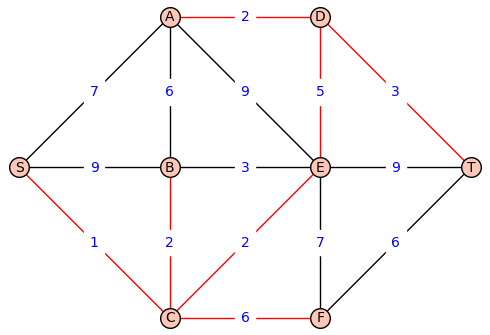

In [91]:
Prim_stablo(graf,F,raspored_vrhova=pozicijeGraf).show(figsize=[5,5])

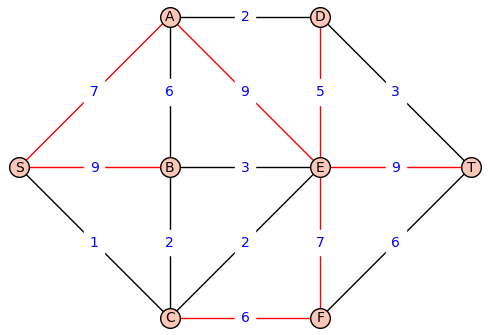

In [92]:
Prim_stablo(graf,F,'max',raspored_vrhova=pozicijeGraf).show(figsize=[5,5])

<h2>Problem trgovačkog putnika</h2>

<p><strong>1. primjer</strong></p>

In [93]:
TSP1=Graph({"A":{"B":5,"C":5,"D":2,"E":3,"F":5},"B":{"C":1,"D":6,"E":6,"F":5},
            "C":{"D":6,"E":6,"F":5},"D":{"E":3,"F":5},"E":{"F":2}},weighted=True)

In [94]:
TSP1nx=TSP1.networkx_graph()

In [95]:
nx.draw_circular(TSP1nx,with_labels=True,node_color='y')
nx.draw_networkx_edge_labels(TSP1nx,pos=nx.circular_layout(TSP1nx),edge_labels=nx.get_edge_attributes(TSP1nx,'weight'),
                            label_pos=0.4);

In [96]:
min_ciklus=TSP1.traveling_salesman_problem()
min_ciklus

In [97]:
min_ciklus.show(edge_labels=True)

<p><strong>2. primjer</strong></p>

In [98]:
TSP2=Graph({"A":{"B":4,"C":9,"D":12,"E":10,"F":3},"B":{"C":6,"D":8,"E":10,"F":6},
            "C":{"D":5,"E":9,"F":12},"D":{"E":4,"F":11},"E":{"F":7}},weighted=True)

In [99]:
TSP2nx=TSP2.networkx_graph()

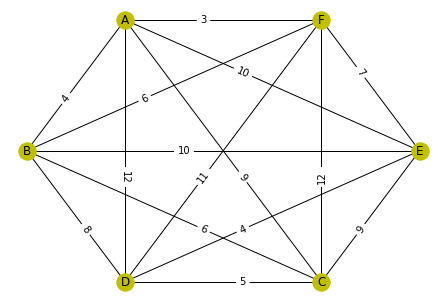

In [100]:
nx.draw_circular(TSP2nx,with_labels=True,node_color='y')
nx.draw_networkx_edge_labels(TSP2nx,pos=nx.circular_layout(TSP2nx),edge_labels=nx.get_edge_attributes(TSP2nx,'weight'),
                            label_pos=0.4);

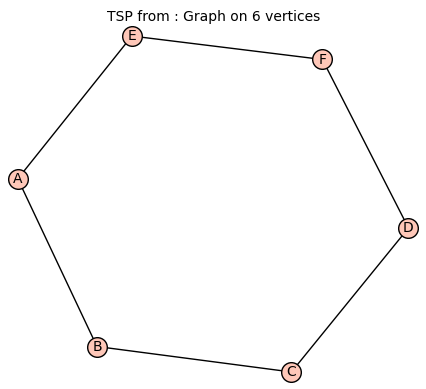

In [101]:
min_ciklus2=TSP2.traveling_salesman_problem()
min_ciklus2

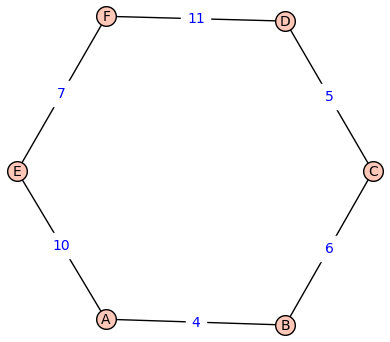

In [102]:
min_ciklus2.show(edge_labels=True)